In [951]:
import pandas as pd
import folium
import geopy.distance
import requests


In [253]:
% cd /Users/tgins/Downloads/Smart\ Data\ Challenge

/Users/tgins/Downloads/Smart Data Challenge


### Data

In [980]:
data = pd.read_csv('Denver_Crime_with_Address_Recent.csv')

data_crime = data[(data.OFFENSE_CATEGORY_ID=='drug-alcohol') & (~(data.OFFENSE_TYPE_ID.str.startswith('drug-marijuana-possess') |data.OFFENSE_TYPE_ID.str.startswith('drug-marijuana-sell') |
                                                                data.OFFENSE_TYPE_ID.str.startswith('drug-marijuana-cultivation')
                                                           ))]

data_clinics = pd.read_csv('SAMSHA_Colorado_Substance_Abuse_and_Mental_Health_Service_Providers_Denver.csv')

data_clinics_1 = data_clinics[(data_clinics.City=='Denver') & (data_clinics.Type_.str.startswith ('Substance abuse treatment') | data_clinics.Type_.str.startswith ('Detox') )
                                                            & (~data_clinics['Opiod_Treatment_Settings'].astype(str).str.startswith('Does not treat opioid addiction'))   
                             ]
                             
    
census = pd.read_csv('census_neighborhood_demographics_2010.csv')

census_1 = census[['NBHD_ID', 'NBRHD_NAME', 'POPULATION_2010', 'PCT_HISPANIC', 'PCT_BLACK', 'PCT_WHITE',
             'PCT_OTHER_RACE', 'PCT_HISPANIC', 'OCCUPIED_HU', 'VACANT_HU', 'HOUSING_UNITS', 'OCCUPIED_HU',
                  'OWNED_W_MORTG_LOAN', 'OWNED_FREE_CLEAR', 'RENTED', 'MALE', 'FEMALE']]

naloxone = pd.read_excel('ArcGIS Naloxone Distribution  Centers - Data.xlsx', skipinitialspace=True)
naloxone.columns = naloxone.columns.str.strip()
naloxone_trimmed = naloxone.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
naloxone_trimmed['municipality']= naloxone_trimmed['municipality'].apply(lambda x: 'Denver' if x.lower()=='denver'else x)
naloxone_1 = naloxone_trimmed[(naloxone_trimmed.municipality=='Denver')]



### Convert Address to Lat and Long Using API

In [978]:
naloxone_1.head()

,objectid,name,municipality,phone,agencyurl,operdays,operhours,pocname,pocphone,pocemail,comments,x,y,fulladdr
18,24,Albertsons/Safeway Pharmacy,Denver,null,null,null,null,null,null,Lisa Raville,Albertsons/Safeway Pharmacy\r\r\n\r\r\n323 Sou...,-1.168731e+07,4.823972e+06,"323 South Broadway, Denver, CO, United States"
24,30,Albertsons/Safeway Pharmacy,Denver,null,null,null,null,null,null,Lisa Raville,Albertsons/Safeway Pharmacy\r\r\n\r\r\n1653 S ...,-1.168212e+07,4.820571e+06,"1653 S Colorado Blvd, Denver, CO, United States"
29,35,Albertsons/Safeway Pharmacy,Denver,null,null,null,null,null,null,Lisa Raville,Albertsons/Safeway Pharmacy \r\r\n\r\r\n2660 F...,-1.169126e+07,4.830456e+06,"2660 Federal Boulevard, Denver, CO, United States"
30,36,Albertsons/Safeway Pharmacy,Denver,null,null,null,null,null,null,Lisa Raville,Albertsons/Safeway Pharmacy\r\r\n\r\r\n6460 E ...,-1.167894e+07,4.817529e+06,"6460 E Yale Ave, Denver, CO, United States"
34,40,Albertsons/Safeway Pharmacy,Denver,null,null,null,null,null,null,Lisa Raville,Albertsons/Safeway Pharmacy \r\r\n\r\r\n2150 S...,-1.168544e+07,4.819181e+06,"2150 S Downing St, Denver, CO, United States"


In [982]:
mapquest_key = 'GEEAb28nEwLa40IsC7DPjmVhxztOnYOr'
prv_key ='QAa0JisnNEerXNLX'


lng_nal = []

lat_nal = []

def convert(address):
    converted = address.replace(" ", '+')
    converted = converted.replace("# ", "")
    converted = converted.replace("#","")
    return converted

clean_address = filter(lambda x:  x != 'None', naloxone_1['fulladdr'])

for address in clean_address:
    #print address
    clean = convert(address)
    results = requests.get('https://www.mapquestapi.com/geocoding/v1/address?key={}&inFormat=kvp&outFormat=json&location={}+Denver%2C+CO&thumbMaps=false'.format(mapquest_key,clean)
                      )
    results = results.json()
    lat_long = results['results'][0]['locations'][0]['displayLatLng']
    #print lat_long
    # append lat long to list
    lng_nal.append(lat_long['lng'])
    lat_nal.append(lat_long['lat'])
    

In [983]:
len(lng_nal)

89

### Coordinates

In [498]:
crime_lat = data_crime['GEO_LAT']
crime_lng = data_crime['GEO_LON']
#crime_test = data_crime[['GEO_LAT','GEO_LON']]
crime_lng_lat = [(ln,lt) for ln, lt in zip(crime_lng,crime_lat)]

clinic_lat = data_clinics_1['Y']
clinic_long = data_clinics_1['X']
clinic_lng_lat = [(ln,lt) for ln, lt in zip(clinic_long,clinic_lat)]

In [903]:
len(crime_lat)

1675

In [368]:
# def plot (x):
#     map = folium.Map(location=[38.58, -99.09], zoom_start=6)
#     fmg = folium.FeatureGroup(name="Clinics")
#     fmg.add_child(folium.Marker([x[0], x[1]], popup= 'Drug Abuse Clinic', icon=folium.Icon(color = "white")))


# crime_test.apply(plot, axis=1)
# map.add_child(fmg)
# map.save("Map_Test.html")

NameError: name 'fmg' is not defined

In [22]:
from pandas.io.json import json_normalize

string_object = open('Denver Statistical Neighborhoods.geojson', 'r').read()

In [750]:
from pandas.io.json import json_normalize
import json

json_object = json.loads(string_object)

df = json_normalize(string_object_1["features"])

In [235]:
json_object['features'][]

{u'features': [{u'geometry': {u'coordinates': [[[[-104.9981218111261,
        39.7910221792403],
       [-104.99817551932136, 39.78256483049413],
       [-104.99835682198051, 39.78261063366066],
       [-104.99934279856494, 39.782875200622456],
       [-105.00029200201571, 39.78313486956646],
       [-105.00141552510023, 39.78347337979709],
       [-105.00204662839455, 39.78359913425428],
       [-105.00242057075398, 39.783648055432124],
       [-105.00283763227019, 39.78367348652459],
       [-105.00295143668392, 39.783666757500136],
       [-105.00317218048643, 39.783653596452254],
       [-105.00350984571399, 39.78362661635417],
       [-105.0042591074379, 39.783530359004246],
       [-105.00503914527364, 39.78342002460316],
       [-105.005693348652, 39.783316257225906],
       [-105.00596978865694, 39.78327007805801],
       [-105.00620461351063, 39.78326744004845],
       [-105.00627660577236, 39.783266631045464],
       [-105.00663504307543, 39.78326406703614],
       [-105.0066

In [475]:
coords = 'geometry.coordinates'

df2 = (df[coords].apply(lambda r: [(i[0][0],i[1][1]) for i in r[0]])
           .apply(pd.Series).stack()
           .reset_index(level=1).rename(columns={0:coords,"level_1":"point"})
           .join(df.drop(coords,1), how='left')).reset_index(level=0)

df2[['lat','long']] = df2[coords].apply(pd.Series)

In [421]:
len(lat)

1675

### Update Neighborhoods with Crime Data

In [792]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


coord_dict ={}

crime_dict = {}

clinic_dict ={}

denver_neighberhoods = df['properties.nbhd_name'].unique()


# init dicts
for each in denver_neighberhoods:
    crime_dict[each]=0
    clinic_dict[each]=0
    coord_dict[each] = list(df['geometry.coordinates'][(df['properties.nbhd_name']==each)])[0][0][0]
    
def contains(list_of_coor, point):
    pnt,poly= Point(point),Polygon(list_of_coor)
    return poly.contains(pnt)

#test =[[-106.941313, 40.739151],[-105.041313, 39.739151], [-104.941313, 39.739151],[-105.041313, 39.739151]]

## Update Crime
for point in crime_lng_lat:
    for n in denver_neighberhoods:
        if contains(coord_dict[n], point):
            crime_dict[n] +=1
            break
            
# Update
clinic_to_neighborhood = []
for pnt in clinic_lng_lat:
    print pnt
    for n in denver_neighberhoods:
        #print n
        if contains(coord_dict[n], pnt):
            clinic_dict[n] +=1
            clinic_to_neighborhood.append(n)
            break
    else: 
        clinic_to_neighborhood.append('None')

(-105.05354299999999, 39.700586)
(-105.0002571, 39.775716100000004)
(-105.0067, 39.8622)
(-105.0243531, 39.6889136)
(-104.9966527, 39.85802994)
(-104.9088894, 39.6990152)
(-104.98657299999999, 39.90095)
(-104.84518829999999, 39.769299200000006)
(-105.09578619999999, 39.7393649)
(-105.03938329999998, 39.6394942)
(-105.0362754, 39.6393556)
(-105.0244868, 39.6765398)
(-104.98524180000001, 39.730200700000005)
(-104.97041899999999, 39.7397161)
(-104.95949399999999, 39.741939)
(-104.91525060000001, 39.73951029999999)
(-104.99616950000001, 39.898526200000006)
(-104.88678200000001, 39.6546916)
(-105.002036, 39.914491999999996)
(-104.88600859999998, 39.6874174)
(-104.87498889999999, 39.6539565)
(-104.9895202, 39.718751)
(-104.9892074, 39.7538045)
(-105.0816226, 39.657757200000006)
(-105.09681200000001, 39.7398518)
(-105.07136200000001, 39.682278000000004)
(-105.08245670000001, 39.7487897)
(-105.04190700000001, 39.70434)
(-105.02558359999999, 39.7457006)
(-104.9677062, 39.763668)
(-104.9531219, 

### Determine Cutoff Based on Distribution

In [986]:
crime_dict

{u'Athmar Park': 25,
 u'Auraria': 12,
 u'Baker': 20,
 u'Barnum': 22,
 u'Barnum West': 14,
 u'Bear Valley': 11,
 u'Belcaro': 3,
 u'Berkeley': 11,
 u'CBD': 55,
 u'Capitol Hill': 168,
 u'Chaffee Park': 5,
 u'Cheesman Park': 65,
 u'Cherry Creek': 12,
 u'City Park': 1,
 u'City Park West': 47,
 u'Civic Center': 84,
 u'Clayton': 6,
 u'Cole': 19,
 u'College View - South Platte': 12,
 u'Congress Park': 5,
 u'Cory - Merrill': 8,
 u'Country Club': 1,
 u'DIA': 5,
 u'East Colfax': 135,
 u'Elyria Swansea': 12,
 u'Five Points': 181,
 u'Fort Logan': 0,
 u'Gateway - Green Valley Ranch': 10,
 u'Globeville': 17,
 u'Goldsmith': 18,
 u'Hale': 8,
 u'Hampden': 12,
 u'Hampden South': 15,
 u'Harvey Park': 14,
 u'Harvey Park South': 5,
 u'Highland': 10,
 u'Hilltop': 1,
 u'Indian Creek': 0,
 u'Jefferson Park': 20,
 u'Kennedy': 2,
 u'Lincoln Park': 47,
 u'Lowry Field': 1,
 u'Mar Lee': 23,
 u'Marston': 3,
 u'Montbello': 43,
 u'Montclair': 4,
 u'North Capitol Hill': 65,
 u'North Park Hill': 4,
 u'Northeast Park Hil

(array([2., 6., 3., 4., 3., 6., 2., 1., 4., 2., 4., 5., 6., 0., 3., 1., 0.,
        1., 1., 2., 3., 0., 2., 1., 0., 2., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 2., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  

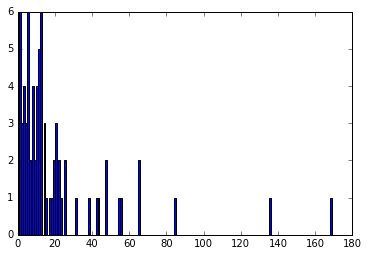

In [274]:
import matplotlib.pyplot as plt
import numpy as np

lst = crime_dict.values()

plt.hist(lst,bins=range(min(lst), max(lst) ))


# use 50 +, 25-50, 0-30

### Group Neighborhoods Based on Cutoffs

In [350]:
low = {k: v for k, v in crime_dict.iteritems() if v < 20}
mid = {k: v for k, v in crime_dict.iteritems() if v < 50 and v >= 20}
high ={k: v for k, v in crime_dict.iteritems() if v >= 50}

### Plot on Map

In [987]:
import os, base64, io
from folium.features import CustomIcon


map = folium.Map(location=[39.7392, -104.9903], zoom_start=12)
fga = folium.FeatureGroup(name="Drug_Arrest")
fgm = folium.FeatureGroup(name = 'Drug Abuse Clinic')

# Add custom icon
# encoded = base64.b64encode(open('clinic_icon.png', 'rb').read())
# decoded = base64.b64decode(encoded)
# icon_url = 'http://www.pngall.com/wp-content/uploads/2016/05/Iron-Man.png'
# icon_a = CustomIcon(
#     icon_url,
#     icon_size=(18, 35),
#     #icon_anchor=(22, 94),
#     #shadow_size=(50, 64),
#     #shadow_anchor=(4, 62),
#     #popup_anchor=(-3, -76)
# )


# add crime points
for lt, lon in zip(crime_lat, crime_lng):
    fga.add_child(folium.CircleMarker([lt, lon], radius = 8,  popup = "Crime Arrest", color="red"))

# add clinics
for lt, lon in zip(clinic_lat, clinic_long):
    icon_url = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAyVBMVEX///8zMzM0NDTz8/P09PT+/v719fX4+Pj7+/v2UxQsLCwlJSVtbW3qUhcqKiro6Oh/f3/n5+dhYWHyUxVCQkL2TgD2UAtEREQgICBubm46OjpmZmb3bz/3cUT4hGYcHBze3t7Pz8+Dg4ONjY2vr6/2RgBTU1OXl5fraz52dnbpSwC7u7ulpaUTExPFxcWdnZ1YWFjsgGP8y7z5jWz929HvkHLpPwD4gFnxdEzqVh7W1tb47un5mn/94NbtmIH/9O/6sJvvq5fyjW6YN3V+AAAV1UlEQVR4nNVdC3vaOtK2MbKNTbglARdOCiQkadIkzbbd3W5Pz7bf+f8/6rNutmRpdDE26fI8LQoIS681oxm9M5KDgL4QUgoBVOi/breXI680pX8ioRA0C8heF8F1bZfzqevTTfZXwn6QVIWUf6MWOq7LOpI063bTNLt4nLIfxOyXMW8lTuQq2roBWBe6XNq8nE9dr26SCsmQ/RUP2Q+G7BJpxH/JCzGvO+R1o7hRJYlS77pV08ihaZ9uElHl96juiOGXEdTpVAUI1tUBtNZVLzdUm27WJTLLJbe+jdHpAdrrxs3RTh26SaSYzz1oGCkA7bfRIKI+nfZpuq4b2ABSWUQcoMet6QagRkS97q1zNxu/dBDu/xEdlAF6yUknADUi2kqcfUfQRbjfUAdbdJO1coyZOEoHXWymTkSdu0mmGZS8oR30GO1WALGlqH2g/nWwWaWlmXAfB2bxT2UmhsH0cP3u+rBLYVetUzNB3VVu8fs3E3FyXxSTbJLn9xxgv2aCVUEtxr4lwHERlq/BICzGQUtXrVU3+S89bk0bEY2TRc4AhmG+QEFvrpoWYP86GCebGmAJcRNXK5qedFAG2L8OxmMRIIbYAmCbbqIWt7ENQHkEcSHfkLo9uWo1QGLx4/5FdNEEiHWxP1etrkstfuIP0FNElRFkghr3ZSZ4XWrx074BJmMdQAxxGDTqHrWi1zSNv0GptZXOdZAXqC527qopl2v/y9Y6yAtYF3szE+0BdqGDlenfINSXDjYAnl5Euekfgp0+ykw0Ab6FiLLpZoGgpqMuiAfUM0DLCFLTj2xNH6GDjPM+laumL+Rj1JsOcovfE0CXEaS6mMSQiB5nJhJm8Vv8shsdrEz/olNXre6mZPFPbCbEAtfFjkRUHYd+AEKumg5gafrH4uWOctXUbra/NV3oIAVITH+i0UGl0z2OYF86OOCmf1ERb93GiFx/2Z8O8gLTxa5jRKgXgL4iSj8gK42OXLWqm7LFfzsR5QxcEHQcIyL2sMrYeKtJpv6gdMPjSkS70EFKX6TWTvfhqukA1gxcVzEiMcr9xjrIC5yB65Qba//LLnWQF7AudqSDrgD7NxMqA/cbAzxORLkudkrAt781fYgoLbBVf0frcmrxfXLVegdYMXCdAATy2k5vJhoM3Bh1RP7JeW2n0cHCDtDMwPl0s5HXdgoRzS6+X2RWgNRoOAI0dRPKa2szgm5mIruYBruLzArQiYFzHodOALqt6LP1tHQVd+vMoa6FgfPoZjcA3UYwjEino7Jkn5C0DFx3I9iPDk7Zdae1Lhp+lC+6WPR0MoLuOsh7NOe6aDQpIAPn0c1GXluvIjqoAQbpLsysANmq/ziAUl5bvyK6jsSJI4gGmRUgCdskx4ioktfWCqC3iNLLlbpoBEjf8wWnbVoBlPPa+nTVVIBEFx3cOoWB8+omqYJOrYPVdechZPolN3zTegR53fa/bKOD09UuYJdLpoDpb7jhOgauPcDezcQqX02ryxGjYV155Bs4r6hngB6uGh/BElKGIbLgSzmKDkurioFr002qxr3OoqEgokTzskEU8ODLNGyafj0Dh9qOIJlHUdynDgoiyvSu/GxXbTHkKw0TwAYD5wVQinL3r4N8vLLVnF5uGDMHzgwQrzR0DJwdoBTl7ttM8BHE32QXUcCJXyyoNoB6Bs6hm/gbJcrdl5mQNC4Lp9XlonUG4RIKbNXv1U1etw3Ao1cTpaBW+zyauqgvkOmmPcBeXDXRTKyac2bGTX8apfN1ZhRRZvolBq5XgK46GGl1kBewCPOmRV2EC6XpPxHA1mZCroLHmDc99WTg3AE2+fOezYRcF3s3vGk/Bs4dYDOvrTdXTV+3NP18Jk/mjgycJ8BGXlt3IirqYAZzMtil4z0iq36rMuYLvhXFLa+NDGFlEHvRQTPphGvyHrkycB4UI7X4yAOg/4peNRONuitvBm5sYeDApKHeXTV9IbuYV46xCwMX2hg4hSj3AXikq6YvZIM5bxo7cFaArgxcC4COZsJb7DK66u+LgfMYwQ5cNV2nB3TVz5qerk0MHP8AZOBUgMgdoL+rNnADSG5L2i0Dp49yn8RV03c6W+/YHR8mzEEwAnRl4JBzXluHrpq+05kDAyd/4MLAsTOI7HltrcyE0yRT956YftZ0Kd5WgGHIdNEI0DGvrZWZMLhqOoB01c+bVjVYdxWad2PQQZ6q2tkIescH5Q/MDJzuKni6MY3gULQXp3XV1BEkEDkDVzY9l0w/dJV8nIBMqAfAPlw1HcABW/XTpmUGDrpKxcAdJaL+OuhsB9Wr1AzctBUDVwMUo9ymvLbeXDX9N4SBo00fxcAh23lt/azobSNIIF4wN7z0caYWN5yZ/rHKwtRHbkhR7i6DLzaAcBXs9nGxi9wYuIXidFY7Gmx5bT27avoCYeCSmoGzXk5h4JrH3oB5bf27avpCqdPIg4EbNBk49dibo0W0Kx2sTf+8ZuBCCwM34KZfFdHICvAErpq+gG8aFzuy6rdermbg1F1Fx46gt5lwkVXOwKWBhYGrLscZOPWEQmip3JurZq0i3Dja17nT5EUZOOFkpliw+Eg9YaSj4Eu7EcT/Z+t5dVwuyMBJl8O6qNn41ji95U3NhFwoIdLOxFEAmP7G/cIM3LAJEMhr681MuCOVGbi5joFTLleu+puWT5/X1p+rZq0i1SXTDczAae4XOwymeRQxm1KP08EjXTV93dJowDlwWoEgq371ZKbjdbA7MyG/Gxg44HKEgWvu7DteBz1W9Bl9uQE0MHDg/cKBcNsI9rKiL3+RF9vt+m4zfni3uVtviyJ3IX6JG84ZuDCzAtQwcKidiPoFX7I8Xz0c9ng8OHWyezk8rPJcO0WKH0gM3Lq6KQaJpysNKK+tlxV9ni+emD7V3jFpcfe0yHMjQC0DZ1FpPIrQ6S09BF+y7frTjiuEuhci3n1ab82sGvVR6ahMqRtumbNEBk4+vaX74EtW3L2UA2Ym1V/uCmOmCdZ5gYFzmJTLlQaHJOW1de+qFXcfdTSY4ud/vCuMLR7NwPnpoLOrNskPqRPANIkPk4mh6WMZOE8RdXTVwu2mzrIwAyRpX5utoemKgSt9nKllKwoz/ZuGxe98RZ/lh8ANIK9y4LOq9nJ01U8ZuIEfA+c3gq6uWrb+7gkwCPbrCdw0GUUfBo7rIrP4Q0cz4eqq5a+RI0CBzA2i1xzug8TArSF/SLA6g/wdaYBy3uimMP9A1UHTLJqPUwBghUub0pyOC7gPpRvOrY4jA1fclNelFh/tn10AugZf8ocAAJj8/PXl6v2vn0lTRPkq6SGHO03tIr3c1ImBe96nPMp95zA9Sa6aUUTHIMDPy9vL5eXt42cAYMC0Rd9pOqPSunMXBi67SxjnTYbQOoKOOjh5hUQ0+Xy7HI1G52fnt59VESV14+R1AneazgNWBq72erZ7et3gwZ726Oyq0X0GWh38uaQAz0bL5U/dCOK6Q9NWqGzAGTjEddEEcJA9MIQOI+jqqoXFDgA4DH7dMoCj0e0vAGA5UWpmm6rTnIFD8ZA5HCaA5T965V3emZkYbA2G/v0lBzi6fA9nXh+2plEhq37KbDswcDm538G+sAEUgi+RcT04eQcDDK6WHOBoeTWEAKJkPDF0Gt9sTvzilYYRYFjsicV/KTzMhHlFT8KbkKG/WnKAo9EHOPM6mQ5Mnc6yacKTEOZN099cWhUvDKEZ4MqZFy0OBoAlQg7w/OwDCLCseygMncar/oDfjLmFgSteSMt7yAZ56mBpf0wAg6vzCuD5HwaAAbbPYKcFBi5GdBThujkxF2hqWnGJrlpkYdWe9yaA6MN5BXD5hwlgaaANADkDR4lfIwMXZmSLHDK5ND7Bl+zV6GwPPyw5wBFBaDjL4tXMqmGInNk2MXBEqPDrKXfSQRvxu30xAkyulhwgQWg6CeFlawJItoW5MHD5E0MYPYOzqAfA8oaZl0tXSw4QIzQmJqO7xgzSbNGNgduyJxMEwb3epRddtchK/BYHZARIEFKAJUJL5vXBdpwUXfXTZVgEMHDFJw4wiFaZ5lqSDjoEX+aWA3OIxaezzfLD0AiwnEDMADkDV/VONyHdpVVeW/JdQyB4Bl+yTWpZ0WOLz6fTD7bE5LF1t56VgZvseHQU71bdPzdd+snA1VWj7/nBlmx8NaoAnl1Z6gYfcwtAIRBe+jjTQZOOzLDtEvPadhel/y1coljEXgHQMJ/bOv3hvAI4+sNSN90Z3RBaEBm4eCGvSXLs+chR7ug6ry6aFYOnwEdEy5uzsgFMFYtvYuCClcN2RJGBC54GVcAuzPObuLocz2uL0/n9xXOR53nxfPcUeQIcTG5sABWLb6YYb0wsOC+IDByaPt09bwvc/4t7MtFy4ot+zXygl8PTYS+t0m2uGn0fFB8tAKOmxbdwqB8LO0DCwInqH+0/Hg4f5xySCJAHvwOep+ObJ7PdSQD5JMcvh0plly1+/TzuNJB/RJvemWj+umniowpNB3xGTxsAQSp61gxh6gGGWyQCTP/89eV9+frHP96/p+9l4bwCWL7zb6oqf//fn1LTaBs6ACw9s5leeKqbbAGIZhOHVsr/L6RF7K/l7WX5eny8JK8lKQgAR2ePS/oVr1IWlr+kpi9CF4DhZKYFGMl5bfCjwdKZIZggvGcLCeAtZ9WquUUunNUF/s3ZaHn7S2g6XbhQ9yFBaD+9BQQYBdd6/rIxgmH2kNZpj3/djloAxBTcXzVBlTzYd8ziQokQHkHbeW34l9fmSZs7j5Pr+pzX4O/LdgBHl3/XO+epubA3PZkhUAdTFuU2ASQI7QBDZg5pK+fLdgDLgjD13xsiUeK9naUNgOpjMUwAMUIHgIPJfd0KumwN8DGtm74H1+VS09lMuLeyDjoBLBHaJpmwdmlYK8u2AM+XrA+46XsTUV3fW4ZQI6JuADFCeysDKqW8lX9ftgR4+e8aYKmHLgAHxFq0H8HS4juEeNicXbXy9V/tAI5uvwpNz1yOVWT20KCDjbw2hYZIQYvfcIE3IpH0z9t2AP+uRzAINi3urTqC1qeSgRa/yTGsAvERRj9uL5feInr7A4kM3MoJIEZo0EHbU8lgi6/y57Jj9PXL+ZI7ZI/MQ1uKAAVvjhZGX74KI4jioSEaLH5QIjTkP9ieShYhwOKrcwBZW4itIL524AY3+FYDXF7JVRLUaDqO589uwlPaQxigy1PJtBZfQ4MVL3IrmgDoh1E1gmQFbNykzOJF9qZLhHAGi5Q0BHCdOouvpZfvLa3EMV0BEx3ECE0AQZdGsz+aWXzD46EggDRIp7H4WjNFQgSmEYwQRUjmFrwCtuyjvzPE88VvuMWHH01jHMESoSbMqgEYhnlkAUjX+HTyXP5hAoibHup8Np3wUIuvEx43gKrFhxyNUhFNAFPK6tdRbss++hdTwoL4DUFoEFEkfazs9U4Viw9y7ZOHFNZBUigR1lFuow7iO6vTDl3TGKFhBKGnklVbwND1xKEV8mKUEJhGoo9ya3UQM3wKSwM0jS0+DJDltZliCLLFh33hkPGJMEBtlFsVUdr0RyV7Arq3JUIDQMvpLVi4JYtvjndtGq00r1tz3mc8yq3XwfK1UNUf0o6ZRju4ZOhPb5F3KYoW3xLvwm6N6ZkvFed9xqPcgIgGwX7rCrC0h5woVQFKFh+iqwSLbxJRsr54ZwI4jDnnfcaj3BBAlI5ddqpxhO0BNiy+faPD885wxmQV5WYWHxZRlHx/dgbILb4/QE7zX7vsb+ACswlAgEPEotyVxQfMBF6ybZrn7xj6wC2+K0BlM/vMnPchF5j7DcTotXltGvVPWZKWm/BQiw8CtJ3ektYrYJehzFYJDFDMaztv5rWJZ1nEq0YihrFpavFBgMDpLbUPVNlDN1nNbwx5Moa8NvGggOBG2jdga7pEaAAoP5UsHjZEFP+S2UNXZdzuEQQw+FZb/MdvDYD1LmxmKZznN2zxYZJCPr1F+yRlag/dZ5t8DiUsoP8+1pzMD7kjQtOR1wgSiw/TTNDpLeJCy8h5a9z/7BXpAabx15qBu/0r0OtggBbydkTrvc1mPNIKL5DkjjTWIdgeuo9g+Q5FLMvh+XHLAf4IAB2kEVkPgJXFtwEEn6QsWnwXgHSrCuAhfbldEtrwCySiwY0xedZg8Z1HUHHTrx1SaRod2d6nkPn5/O0/j+ffPoMA759DT4DM4ltHsOnJ1KT/zBqJVf3WQgy1yTcu+fPPn7RHiogOS4Bbb4DU4hvydslck4AAE3uUWwXIswccTogVz5Mp76a3iDKLbwAoPZVMR1dZo9w6gKXNeI1MALUiOnz1nWS4xTektTaj3Bo+zhLl1gPEqan71OEAVcFM7AeeZkK1+BoLlfBxDEC6yhzlhgCGWBlTO8BqNZHeF/LlnCfw2uJrJnCamQOLqLvF13wT5qu9BWB1Ml6wX3l6MoLF57u34JQT+a+mF2uKcpsAloXsebwLlPNFVcoi+T7e+qwm5Ka5xbcDBDhxQ5TbAhDf3+3su01Eg++zrceCV2ma2kMrQJgyhqPcdoBlYZKP8cYczYqeAkQvm9yVc9Y3PYG9RPoJ/RiMajjltRk7khXr65fqpI86EoX/39+sC2faEGgazGtjAIjFNzyP3jWvzViYFMW7p315TR6rDOJptH96t91OXJltuGm/vDZ1oeWQ1+bQkUGY5dtitXi4vv/09On+5mGxKra5Y/jM0jSQ18YAsig3DNAhr80JIH1l2STHr0kGObt+ABlCNa+tPjMJf8MlByA7bHlt7gA7r0vf1bw2zYkUBoC2vLY3B2jIa3MD6JrXdnqAvKDktXkCNOe1vSHA6gMor80VoDGv7XcA2Mhr02SqmwE657WdGKBQV5/XBkS5/fLa3hCg+IGU16YCtOS1DYdwXtsbApTq6vLagCi3ngtwzWt7K4C6vLYa4BF5bW8IsPFBpuS1qbkSJoBAXtvvA1CIcrcD6JzXdiqASt3J9XEAg4Oyzfu3GsHBgJzFcQRAtLMdv/m2IzgIi7kZIDIDTCPEtuf9FgA13+QzM0Aor02Yf9FdbmvlLQHeISNAp6eSJbNyOf57vvLtLDEDdHwq2ff7hzF+vRtv2Dt76QqbsXfdsVD3nflyUt2HTzuziLo+lYwHIOqtu5xHD5KqwPW6Ou+ff2OqC1+uWRdu2pKYXL8sO6vlX8JPT9LUrYMvrC6cOQFuDGnXtFPinumXTvFBe4/gTcqGm9EhwFZPM1eDL5EHQDghtg+ArUYQSFV9E4DWp5J1JKJg1MCwSfk4gI5PJTtSRFWAp9bBRl5bNwCPElHDzpdWAG1PJTsOoNrpk+ug7alk/+tmwpYVdSTAqIUOdj2CclYU7whfZ9QUIz/4P6me+2WtW1VR6yamuh00HSTNpulfPIRYMYtp7RBKbrpTXaTUTZW6iaZuB02rdelfPISI+DqjKqR1AQF1jVV86vo37VIX1f8LBaQpBEDBoa6uSl911W7+P2vyQaHxQm3wAAAAAElFTkSuQmCC'
    icon_a = CustomIcon(
    icon_url,
    icon_size=(15, 15),
    )
    fgm.add_child(folium.Marker([lt, lon], popup= 'Drug Abuse Clinic', icon = icon_a ))

# add naloxone
for lt, lon in zip(lat_nal, lng_nal):
    icon2_url = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAhFBMVEX///8AAADl5eXy8vLo6Oji4uLX19fe3t7T09PLy8vOzs739/f6+vq8vLxMTEzn5+dAQECIiIjFxcWgoKDu7u47OztWVlanp6cUFBQwMDBHR0eRkZFubm6ZmZmxsbFfX18nJycbGxsiIiJ6enotLS1+fn4MDAyurq5UVFRwcHBnZ2eEhIQlYOEFAAAGuklEQVR4nO2d7VriMBBGG0E+BEWUFYRVkXVd173/+1vSptC0M21aqck79PwSW3zmmALNZDJEUUeHBEY93xG0zED98h1CuwyVUgPfQbSJFlQ/fEfRIrGgUkvfcbSGEVQXvgNpi0sj2PcdSFt0guhcGMGZ70DaQrzgzP1ddD5tP5zTU0dQPbcfz8lJBe+qT50r9dh+QKemr1Iq70g3+5PW3xHTSTkKVo6iFrz5nqhOSFZQqT9lp2IKLpTNE38q5iWaF1TqN3eqFEGlPulTn8QIMi81LXj73fF9mR4puP/EK962gAq+M4Zqtcidei9McM+ldaoWxMvecJeoYZQ5FXQEV+WG6vpwqhZUHkNtRir4wiumGbdl/AgtTzx5T6/FB15xE5+6NI/+eg65HpPXJOqr/c+3vKIet6X1CIWsYBS98YovGUGkUUwFx+ZhyafGo/Xop9+4nentLEHu3o0CRPEpJ3hMlYpRnN2o3Gx+4KzITDyC4zqfrrgTp1jgWb7istrN8OI71KZs5I/iL/mj+Clf8Ua+4g/xitOts+KD71gbUpHakKC4KEtPiVB0v31T6sN3sE2oIwipWE8QcKmtriDcUs24tiDYKNYXfMYaxfqCg7iYESbdf9VAMKnXBBnFZoJJEgtiFGPBy5L0dwGzNjXXPwMsvI10nP3SDH+JIMAopoLuisl6QCoY/CjGgqbs0k3RCGZSO0ErxungQ1Xi2kHQpMut3FXAiragiyIlGLBiXrBa0Qg+5X8faFVmLGgXXlQkpMx6QEGQLMPxz5AQLFfkBYNUHJGCZYolI7hS6i04xfGLUkPqwAcjaEpQ7otHXqe6UDU8xahPCnKKu0SAEFxNkh0NASpy0IorvcGUGsGJfk5/dfgnIEAX2uwViXW4ldlZq/8t24nfuGtAK26JEVRGMHmD2qErFnm3BNNLFoKSojdC8PjKlaZoBLMjLkvRlBPb770rQYpGMP+aXeH0LahQXHBnASmWru6zgsc3IABKFM2eYXqcJSj2+ePrrQTFK/7oY7LXAUfxJ60YvwppQbOdI78zJVx4RepIMtfvvUEp/mUUqd+/meesD+MMAaNICZoZ4uNhnEFwVdwawUN9FY6iW+3iLi+I1GnDRTGd/loVcpIUU8HcAg+O4u8KwVdaEKmhSLliKkisfOA0ZipTTCdM5NIOjuI/VvCdH0EZiq+5jFuGdU9X5hLrI4EyLypozEyDyJXfRtFEhGIsQAjGi8PTNyGKnKDZAsgsAwUIozgk0hlGcJrsVMVRdN5CZBb3D5sAxCmmgse9xsIUc1NFeYrpZN/eL43TAJYsx6gaQVGKhcm+NEVisi9LkZzsHxiV/92AoBb1Y9i58J53CYrpa5AS3MTjCq+YvNIowXmUXLpXfuOuAbPNXY8RNReex09ay1CkBP8lz4n3BsArUgWOpmWh6cMxLv+7AeHcj8EWRFL800xQnKJpNGW1inFo7BsIDopGcGj/Fkexsv0LLZjtfBc6FYqmUVhBUIyiEaQ6UrFNb8OjRLFEEGiNWLefYjAtwkhBnD53GkbRNEKZkQdxVmxiGMX4I+GCPATXBoZXpEcQKKGRwiiOmdaFUB0LDIwi0xUG58Y0A/uOShDonsUqajQQwbmfsXFWXPmOtDGuiqXfNRE2jm1EfIf5FZwUsb/BzkXRXKRAkwsLF8V4EG9hm2m6NIRZasEd0vzJwknxA6aFD4VrWx/Em1PDyFERbgp1xFURa6JvQSoSJVVz34E2p9gMfTOhEjYl36QVOjnFp3h1mFAEvkcdFPwiMmmDOpOKMor3mV8Sm/0h5/sJiaJ1n012M8DLSh0Y5ucRTLsGsNxpltymGbbDD+wdap6lmtFVKkCdCiroces4W9+RnRJ6Ahls27cm0N/9Athgmodeq0Gd8ZP0XilFpC8Hq2RKlp8CTzQIyI/G++rnAUG2pED8dnMectMmTkcNF6idG8A34RREbSPwZJGkuKgq670mIjKrqGsZPPl6N1G3pwn9XCmDuMs0iiY7WxGn04Q79u4MgddpPnsDnCPmuV7OP4/34ji7TWsySYdy5zuS9khvAGTNoix6DyLvTi2STBxuzZQDyTCKSmgUiIcReLXGgZ7uI4Kzha8RS/mKz+ehKPu1GH/6d4roaEWcXYqN6BQlcHceitKSxDk6RQmcgeK4UxTAGSjqJSpZC+AFOkUJjM5DEbjq3YUzUBychyL2/tNKOkUJDGSWa2QZdooCOBNFkSUpRy47RQGcgaLelLLxHUS7dIoSmMlX7MsugdN0ihJYyC9nWEjP3ESRmE3gHR0dHf75D4seVJ5CB7xjAAAAAElFTkSuQmCC'
    icon_b = CustomIcon(
    icon2_url,
    icon_size=(15, 15),
    )
    fgm.add_child(folium.Marker([lt, lon], popup= 'Naloxone', icon = icon_b ))

    
#add neighborhoods
fgn = folium.FeatureGroup(name = 'Neighborhoods')

fgn.add_child(folium.GeoJson(data= open('Denver Statistical Neighborhoods.geojson', 'r').read(),
                            style_function=lambda x: {'fillColor':'red' if x['properties']['nbhd_name']in high
                            else 'orange' if x['properties']['nbhd_name']in mid
                            else 'green'}))


map.add_child(fga)
map.add_child(fgn)
map.add_child(fgm)
map.add_child(folium.LayerControl())
map.save("Map_Drug_Final.html")

### Combine Datasets

In [539]:
crime_df = pd.DataFrame.from_dict(data=crime_dict, orient='index')
crime_df['drug_crime_values']= crime_df[0] 
clinic_df = pd.DataFrame.from_dict(data=clinic_dict, orient='index')
clinic_df['clinic_count_values'] = clinic_df[0]


In [543]:
combined = census_1.set_index('NBRHD_NAME').join(crime_df)
combined_1 = combined.join(clinic_df, lsuffix='_combined', rsuffix='_clinic_df')
combined_2 =  combined_1.loc[:, combined_1.columns != '0_combined' ]
combined_2 = combined_2.drop('0_clinic_df', axis=1)
combined_2.to_csv(index_label = "Denver_Neighborhoods", path_or_buf='combined_2.csv')

In [541]:
pd.to_csv

,NBHD_ID,POPULATION_2010,HISPANIC_2010,WHITE_2010,BLACK_2010,NATIVEAM_2010,ASIAN_2010,HAWPACIS_2010,OTHER_2010,TWO_OR_MORE_2010,...,RENTED_AGE_45_TO_54,RENTED_AGE_55_TO_59,RENTED_AGE_60_TO_64,RENTED_AGE_65_TO_74,RENTED_AGE_75_TO_84,RENTED_AGE_85_PLUS,SHAPE_Length,SHAPE_Area,drug_crime_values,clinic_count_values
NBRHD_NAME,,,,,,,,,,,,,,,,,,,,,
Hampden,32,17547,2505,11750,1963,64,726,20,38,481,...,700,304,253,285,200,229,0.200466,0.000768,12.0,2.0
Baker,3,4879,1664,2854,144,43,52,10,7,105,...,231,113,64,82,23,7,0.101767,0.000406,20.0,1.0
Washington Park,70,6905,295,6356,28,9,119,3,13,82,...,70,31,36,27,6,21,0.090445,0.000411,1.0,0.0
Cherry Creek,13,5589,332,4896,79,17,168,4,3,90,...,211,79,92,161,224,207,0.063923,0.000228,12.0,0.0
Country Club,22,3001,94,2740,20,8,77,1,5,56,...,34,14,17,9,4,2,0.052865,0.000177,1.0,0.0


### Average Distance to Rehab Clinic

In [ ]:
# for each neighborhood that has at least 20 crimes
# for each clinic 
# if clinic point is in neighborhood calculate absolute difference between all coordinates and that point then get average
# else : calculate absolute difference between every polygon coord within each neighborhood and divide by total coordinates 
# of that neighberhood to get the average. Select the minimum score for closest neighborhood.

In [906]:
distance_dict = {}

at_risk_neighborhoods = {key for key in mid.iterkeys()}
at_risk_neighborhoods.update(high)

def search(data):
    for n in at_risk_neighborhoods:
        if contains(coord_dict[n], data):
            return n, coord_dict[n]
            break

def convert (point_1, point_2):
    return geopy.distance.vincenty(point_1[::-1], point_2[::-1]).miles

def average_distance (num, coord):
    lng = np.array([each[0] for each in coord])
    lat =  np.array([each[1] for each in coord])
    #lng_err = abs (num[0] - lng)
    #lat_err = abs (num[1] - lat)
    error = np.array([convert(num, each) for each in coord])
    #lng_avg = sum (lng_err) / len(lng_err) 
    #lat_avg = sum (lat_err) / len(lat_err) 
    return sum(error)/len(error) # need to check to confirm this is right


def search_closest_neighborhood (point):
    #n_dict = {}
    lst_test = []
    for n in clinic_to_neighborhood:
        #n_dict[n] = average_distance(point, coord_dict[n])
        lst_test.append(average_distance(point, coord_dict[n]))
    minimum_indx = np.argmin (np.array(lst_test))
    minim = np.min(np.array(lst_test))
    return clinic_to_neighborhood[minimum_indx],minimum_indx,  minim, lst_test

def search_closest_point (neighborhood):
    lst_test =[]
    for point in clinic_lng_lat:
        lst_test.append(average_distance(point, coord_dict[neighborhood]))
    minimum_indx = np.argmin (np.array(lst_test))
    minim = np.min(np.array(lst_test))
    return clinic_to_neighborhood[minimum_indx],minimum_indx,  minim, lst_test     

# for pnt in clinic_lng_lat:
#     print pnt
# #     print search_closest(pnt)
#     # if point is in neighborhood
#     if type (search(pnt))==tuple:
#         distance_dict[search(pnt)[0]] =  average_distance(pnt,search(pnt)[1])
#     else:
#         # find the closest point to that neighborhood
#         print search_closest_neighborhood(pnt)
# print distance_dict


# iterate through all clinics
for pnt in clinic_lng_lat:
    if type (search(pnt))==tuple:
        distance_dict[search(pnt)[0]] =  average_distance(pnt,search(pnt)[1])
print distance_dict

# for those neighborhoods that don't have clinics
print '--------------------'
for neigh in at_risk_neighborhoods:
    if neigh not in distance_dict:
        distance_dict[neigh] = search_closest_point(neigh)[2]
        print neigh, search_closest_point(neigh)[0:3]

 {u'Civic Center': 0.34940874794651366, u'Capitol Hill': 0.6011255505811838, u'Stapleton': 2.24389865997737, u'Sunnyside': 0.8839035658616471, u'Baker': 1.0073104654654035, u'Cheesman Park': 0.5229273560665237, u'Five Points': 0.9213597169431318, u'West Colfax': 1.0925577540884945, u'Ruby Hill': 1.1867459010698984, u'Westwood': 0.7157177821892106, u'Washington Virginia Vale': 0.7806079054314923}
--------------------
City Park West (u'Cheesman Park', 13, 0.5184938040485806) 6.863163507010476
Lincoln Park (u'Civic Center', 42, 0.7134615989095179) 8.863228309699371
Jefferson Park (u'West Colfax', 28, 0.6412367000097997) 9.393857657890285
Athmar Park (u'Baker', 21, 1.4291731842303006) 9.806165477198128
North Capitol Hill (u'Five Points', 52, 0.5645942360211532) 7.633298757050895
Mar Lee (u'Ruby Hill', 3, 0.8835347056932201) 11.779294886347973
Villa Park (u'Sun Valley', 38, 0.9510486848247609) 10.820956868383591
CBD (u'Civic Center', 42, 0.6510274088287111) 8.310290858585297
Barnum (u'Westw

In [907]:
clinic_lng_lat[35]

(-104.843365, 39.772209000000004)

### Convert to Distance

In [875]:
import geopy.distance

coords_1 = ( 39.734123150387276, -105.03749867327836)
coords_2 = (39.700074, -104.9110931380000001)

print geopy.distance.vincenty(coords_1, coords_2).miles

0.138307386525


In [886]:
for pnt in clinic_lng_lat:
    print search(pnt)

None
(u'Sunnyside', [[-104.99817551932136, 39.78256483049413], [-104.99820236241895, 39.7783370221242], [-104.99819471139112, 39.77654812962076], [-104.99819251038313, 39.77548880576965], [-104.99819179938054, 39.77422153616258], [-104.99821048444845, 39.77297802564184], [-104.99820963144536, 39.77173031410591], [-104.99819799240304, 39.770498683628354], [-104.99820432742608, 39.76938674258598], [-104.9982032874223, 39.769297304260796], [-104.99838121006916, 39.769296020256135], [-105.00043570653816, 39.76932000334334], [-105.00058837409317, 39.76928721922415], [-105.00117448322389, 39.769284557214505], [-105.00175970235146, 39.76928188820475], [-105.0023591495307, 39.769279276195256], [-105.00296660273908, 39.76927669518589], [-105.003557985889, 39.76928262220745], [-105.00361401209265, 39.76928320120957], [-105.00413780799691, 39.76928849722882], [-105.00470523705978, 39.76928608222003], [-105.0052877881776, 39.76928338421019], [-105.00586141226295, 39.76928545021773], [-105.00604817

In [897]:
pd.DataFrame.from_dict(distance_dict, orient='index')

,0
Sunnyside,0.883904
Cheesman Park,0.522927
Ruby Hill,1.186746
Jefferson Park,0.641237
Villa Park,0.951049
Barnum,1.198883
Montbello,1.414682
Stapleton,2.243899
East Colfax,1.140995
Five Points,0.921360


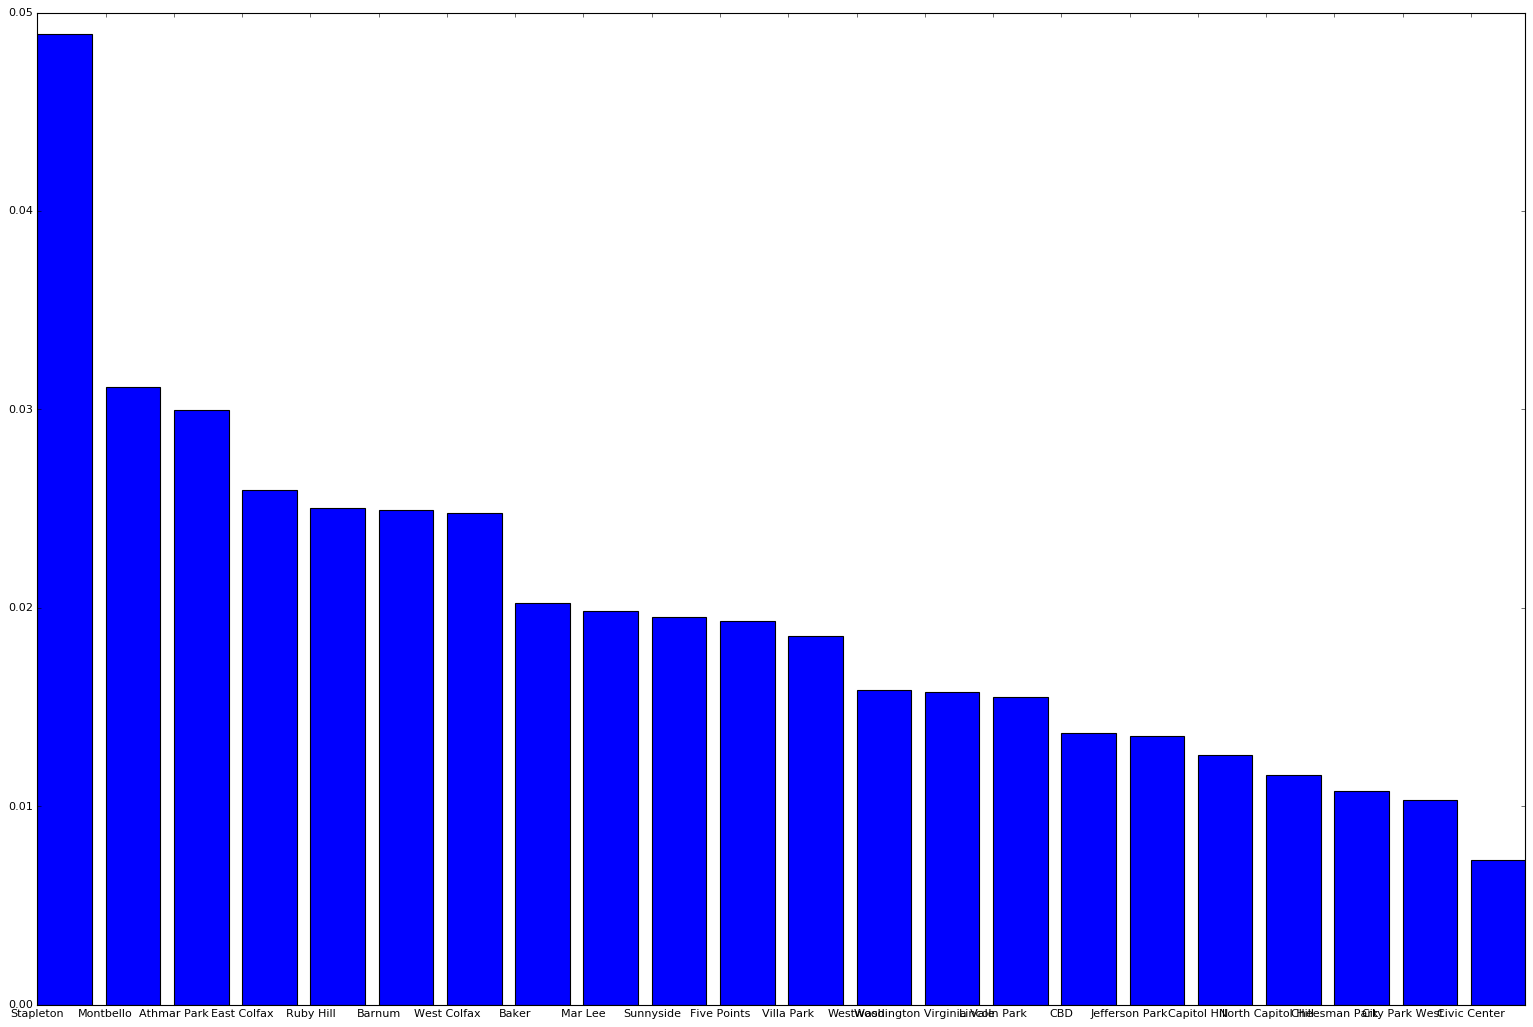

In [865]:
# # for python 2.x:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

sort = sorted(distance_dict.iteritems(), key=lambda (k,v): (v,k), reverse=True)
#sort = sorted ({key = lambda(k,v):(v, k) for key, val in distance_dict.iteritems()})

x, y = zip(*sort)

#ax.set_xticklabels(x, rotation=45, rotation_mode="anchor")
#ax.set_xticklabels(xlabels, rotation=45, rotation_mode="anchor")

figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
# locs, labels = plt.xticks() 
# xticks(ticks, [labels])
plt.bar(range(len(x)), y , align='edge', orientation= 'vertical')  
plt.xticks(range(len(x)), x) 
plt.autoscale()

plt.show()

In [843]:
?plt.bar()

### Average Distance to Nlx Clinic